In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle

from matplotlib.font_manager import FontProperties

### Modify MI_idx for descriptives

- Remove "common"
- Remove "politics" only for nopol
- Move "politics" to index 1 for pol

In [19]:
MI_idx = pd.read_csv("/Users/merieldoyle/Desktop/ckMI/data/MI_idx.csv", index_col = None)
MI_idx = MI_idx.drop(["common"], axis = 1) # drop common

ONLY FOR NOPOL:

In [36]:
# MI_idx = MI_idx.drop(["politics"], axis = 1) # drop politics

ONLY FOR POL:

In [9]:
# OLD – define liberal by politics <= 4, conservative by politics > 4

# MI_idx["politics 2"] = np.where(MI_idx["politics"] > 4, True, False)
# MI_idx["politics 2"] = MI_idx["politics 2"].map({True: "conservative", False: "liberal"})
# MI_idx = MI_idx.drop(["politics"], axis = 1)

In [21]:
# NEW – add a column in MI_idx that indicates whether the value in the politics column is greater than 4, less than 4, or equal to 4
# MI_idx['politics_2'] = MI_idx['politics'].apply(lambda x: 'conservative' if x > 4 else ('liberal' if x < 4 else 'centrist'))
# MI_idx = MI_idx.drop(["politics"], axis = 1)

,condition,mental illness,difficulty changing,desired change,genes,punishment,control,wrongness,internal distress,politics_2
0,pedophile,3.0,4.0,3.0,5.0,5.0,4.0,4.0,4.0,liberal
1,pedophile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,conservative
2,pedophile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,conservative
3,pedophile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,liberal
4,pedophile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,liberal
...,...,...,...,...,...,...,...,...,...,...
12215,schizophrenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,conservative
12216,schizophrenia,4.0,6.0,6.0,6.0,5.0,5.0,6.0,4.0,liberal
12217,schizophrenia,7.0,7.0,5.0,4.0,4.0,1.0,1.0,5.0,conservative
12218,schizophrenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,conservative


In [6]:
# move politics to index 1

columns = MI_idx.columns.tolist()
politics = columns.pop(9)
columns.insert(1, politics)
MI_idx = MI_idx[columns]
MI_idx

,condition,politics 2,mental illness,difficulty changing,desired change,genes,punishment,control,wrongness,internal distress
0,pedophile,liberal,3.0,4.0,3.0,5.0,5.0,4.0,4.0,4.0
1,pedophile,conservative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,pedophile,conservative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pedophile,liberal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,pedophile,liberal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
12215,schizophrenia,conservative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12216,schizophrenia,liberal,4.0,6.0,6.0,6.0,5.0,5.0,6.0,4.0
12217,schizophrenia,conservative,7.0,7.0,5.0,4.0,4.0,1.0,1.0,5.0
12218,schizophrenia,conservative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Create new df with mean, std, and stde

In [37]:
# def standard_error(x):
#     return np.std(x, ddof=1) / np.sqrt(len(x))

ONLY FOR NOPOL:

In [51]:
# wide_stde_nopol = pd.pivot_table(MI_idx, 
#                           index='condition', 
#                           values=MI_idx.columns[:9], 
#                           aggfunc=('mean', 'std', standard_error))

# wide_stde_nopol

# # wide_stde_nopol.to_csv("wide_stde_nopol.csv")

ONLY FOR POL:

In [22]:
# wide_stde = pd.pivot_table(MI_idx, 
#                           index='condition', 
#                           columns='politics 2', 
#                           values=MI_idx.columns[:9], 
#                           aggfunc=('mean', 'std', standard_error))

# wide_stde

# # wide_stde.to_csv("wide_stde.csv")

ONLY FOR NOPOL:

### Start here

## DESCRIPTIVES

Manually created "nopol_transformed.csv" & "pol_transformed.csv" in excel

In [2]:
MI_idx = pd.read_csv("/Users/merieldoyle/Desktop/ckMI/data/nopol_transformed.csv", index_col = None)
MI_idx

,condition,question,mean,std,stde
0,depression,control,3.093555,1.530788,0.043790
1,drugs,control,3.601660,1.684908,0.048199
2,fetish,control,3.401114,1.679851,0.048055
3,gay,control,2.360248,1.740008,0.049776
4,obese,control,5.021909,1.324766,0.037897
...,...,...,...,...,...
75,pedophile,wrongness,6.603734,1.103117,0.031556
76,psychopath,wrongness,5.565217,1.645247,0.047065
77,racist,wrongness,6.236626,1.357521,0.038834
78,schizophrenia,wrongness,3.343035,2.129358,0.060913


In [3]:
cols_nopol = {('Mental Illness'): (0.298, 0.447, 0.690, 1.0),
        ('Genes'): (0.769, 0.306, 0.322, 1.0),
        ('Wrongness'): (0.95, 0.6, 0.6, 1.0),
        ('Punishment'): (0.506, 0.447, 0.701, 1.0),
        ('Desired Change'): (0.333, 0.659, 0.408, 1.0),
        ('Control'): (0.576, 0.470, 0.376, 1.00),
        ('Difficulty Changing'): (0.867, 0.518, 0.322, 1.0),
        ('Internal Distress'): (0.368, 0.676, 0.678, 1.0)}

cols_nopol

{'Mental Illness': (0.298, 0.447, 0.69, 1.0),
 'Genes': (0.769, 0.306, 0.322, 1.0),
 'Wrongness': (0.95, 0.6, 0.6, 1.0),
 'Punishment': (0.506, 0.447, 0.701, 1.0),
 'Desired Change': (0.333, 0.659, 0.408, 1.0),
 'Control': (0.576, 0.47, 0.376, 1.0),
 'Difficulty Changing': (0.867, 0.518, 0.322, 1.0),
 'Internal Distress': (0.368, 0.676, 0.678, 1.0)}

In [4]:
question = MI_idx['question']

def getcolor_nopol(q):
    key = (q)
    if key in cols_nopol:
        # print(f"Key {key} found in cols_nopol dictionary!")
        return tuple(cols_nopol[key][:4])  # return the RGBA values as a tuple
    else:
        # print(f"Key {key} not found in cols_nopol dictionary!")
        return (0.5, 0.5, 0.5, 0.5)  # or some other default color
    
# [getcolor_nopol(q) for q in question]

In [5]:
MI_idx.columns = MI_idx.columns.str.title()
MI_idx.iloc[:,0:2] = MI_idx.iloc[:,0:2].apply(lambda x: x.str.title())
MI_idx

,Condition,Question,Mean,Std,Stde
0,Depression,Control,3.093555,1.530788,0.043790
1,Drugs,Control,3.601660,1.684908,0.048199
2,Fetish,Control,3.401114,1.679851,0.048055
3,Gay,Control,2.360248,1.740008,0.049776
4,Obese,Control,5.021909,1.324766,0.037897
...,...,...,...,...,...
75,Pedophile,Wrongness,6.603734,1.103117,0.031556
76,Psychopath,Wrongness,5.565217,1.645247,0.047065
77,Racist,Wrongness,6.236626,1.357521,0.038834
78,Schizophrenia,Wrongness,3.343035,2.129358,0.060913


/Users/merieldoyle/opt/anaconda3/envs/ckMIconda/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


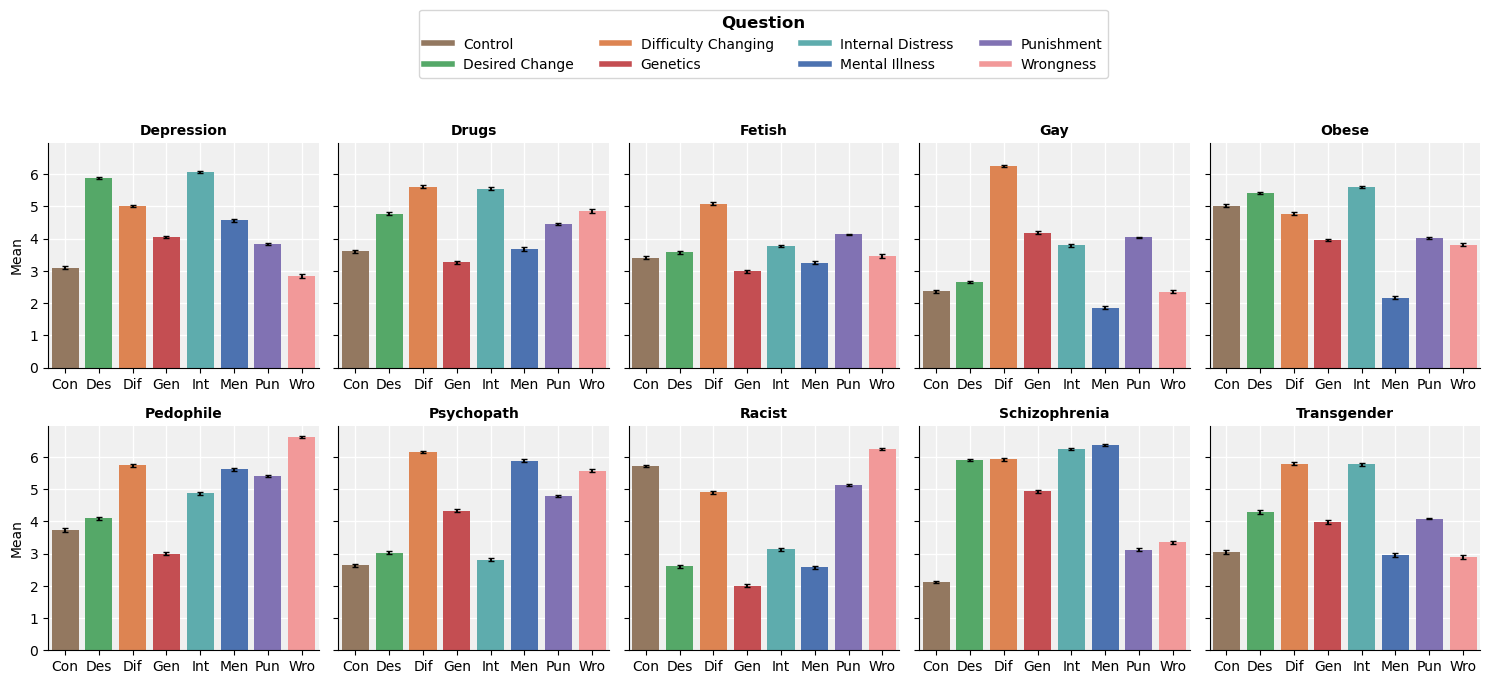

In [6]:
def custom_barplot_nopol(x, y, data, width, palette, stde_col, **kwargs):
    x_categories = data[x].unique()
    
    for i, x_val in enumerate(x_categories):
        x_data = data[data[x] == x_val]
        position = i
        mean = x_data[y].mean()
        stde_val = x_data[stde_col].values[0] if not x_data.empty else 0

        kwargs_no_color = {k: v for k, v in kwargs.items() if k != "color"}
        plt.bar(position,
                mean,
                width=width,
                color=palette[x_val],
                linewidth=1,
                **kwargs_no_color)

        # add error bars
        plt.errorbar(position, mean, yerr=stde_val, fmt='none', ecolor='black', capsize=2, elinewidth=1.5)

    abbreviations = [q[:3] for q in x_categories] # set x-tick labels to abbreviations of each question
    plt.xticks(range(len(x_categories)), abbreviations, ha="center")

g = sns.FacetGrid(data=MI_idx, col="Condition", col_wrap=5, sharex=False, sharey=True, height=3, aspect=1)
g.map_dataframe(custom_barplot_nopol, x="Question", y="Mean", width=0.8, palette=cols_nopol, stde_col="Stde")

# AESTHETICS

g.set(xlim=(-0.5, 7.5)) # set x-axis limits for each facet
g.set_xlabels('')  # remove x-axis label
g.set_titles(fontweight='bold', col_template="{col_name}") # title

for ax in g.axes.flat:
    ax.set_facecolor('#F0F0F0')  # set background color
    ax.yaxis.grid(True, linestyle='-', linewidth=1, alpha=1, color = 'white')  # faint horizontal gridlines
    ax.xaxis.grid(True, linestyle='-', linewidth=1, alpha=1, color = 'white')  # faint vertical gridlines
    ax.set_axisbelow(True)  # put gridlines below bar plots

unique_colors = [
    (0.576, 0.47, 0.376, 1.0), # control / brown
    (0.333, 0.659, 0.408, 1.0), # desired change / green
    (0.867, 0.518, 0.322, 1.0), # difficulty changing / orange
    (0.769, 0.306, 0.322, 1.0), # genes / red
    (0.368, 0.676, 0.678, 1.0), # internal distress / teal
    (0.298, 0.447, 0.69, 1.0), # mental illness / blue
    (0.506, 0.447, 0.701, 1.0), # punishment / purple
    (0.95, 0.6, 0.6, 1.0)] # wrongness / pink

custom_labels = ["Control", 
                 "Desired Change", 
                 "Difficulty Changing", 
                 "Genetics", 
                 "Internal Distress", 
                 "Mental Illness",
                 "Punishment", 
                 "Wrongness"]

legend_elements = [Line2D([0], [0], color=unique_colors[i], lw=4, label=custom_labels[i]) 
                   for i in range(len(unique_colors))]

spacer = mpl.lines.Line2D([0], [0], linestyle='none', color='none', label='')


legend = plt.legend(handles=legend_elements, 
                    bbox_to_anchor=(-1.65, 2.7), 
                    loc='center', ncol=4, 
                    title='Question', 
                    title_fontsize=12)

legend.get_title().set_fontweight('bold')  # bold legend title

plt.show()

save_path = "/Users/merieldoyle/Desktop/descriptives.png"
g.savefig(save_path, dpi=300)

### DESCRIPTIVES BY IDEOLOGY

In [3]:
MI_idx = pd.read_csv("/Users/merieldoyle/Desktop/ckMI/data/pol_transformed.csv", index_col = None)
MI_idx

,condition,question,politics,mean,std,stde
0,depression,control,conservative,3.260000,1.543247,0.080014
1,drugs,control,conservative,3.781690,1.953779,0.101299
2,fetish,control,conservative,3.914286,1.732685,0.089836
3,gay,control,conservative,3.083333,1.852490,0.096047
4,obese,control,conservative,5.225131,1.255135,0.065076
...,...,...,...,...,...,...
155,pedophile,wrongness,liberal,6.561765,1.125860,0.038617
156,psychopath,wrongness,liberal,5.568807,1.607309,0.055130
157,racist,wrongness,liberal,6.501484,1.023895,0.035119
158,schizophrenia,wrongness,liberal,3.154079,2.142741,0.073495


In [4]:
MI_idx.columns = MI_idx.columns.str.title()
MI_idx.iloc[:,0:3] = MI_idx.iloc[:,0:3].apply(lambda x: x.str.title())
MI_idx

,Condition,Question,Politics,Mean,Std,Stde
0,Depression,Control,Conservative,3.260000,1.543247,0.080014
1,Drugs,Control,Conservative,3.781690,1.953779,0.101299
2,Fetish,Control,Conservative,3.914286,1.732685,0.089836
3,Gay,Control,Conservative,3.083333,1.852490,0.096047
4,Obese,Control,Conservative,5.225131,1.255135,0.065076
...,...,...,...,...,...,...
155,Pedophile,Wrongness,Liberal,6.561765,1.125860,0.038617
156,Psychopath,Wrongness,Liberal,5.568807,1.607309,0.055130
157,Racist,Wrongness,Liberal,6.501484,1.023895,0.035119
158,Schizophrenia,Wrongness,Liberal,3.154079,2.142741,0.073495


In [5]:
# define cols using RGBA color codes

cols = {('Mental Illness', 'Liberal'): (0.298, 0.447, 0.690, 1.0),
        ('Mental Illness', 'Conservative'): (0.298, 0.447, 0.690, 1.0),
        ('Genes', 'Liberal'): (0.769, 0.306, 0.322, 1.0),
        ('Genes', 'Conservative'): (0.769, 0.306, 0.322, 1.0),
        ('Wrongness', 'Liberal'): (0.95, 0.6, 0.6, 1.0),
        ('Wrongness', 'Conservative'): (0.95, 0.6, 0.6, 1.0),
        ('Punishment', 'Liberal'): (0.506, 0.447, 0.701, 1.0),
        ('Punishment', 'Conservative'): (0.506, 0.447, 0.701, 1.0),
        ('Desired Change', 'Liberal'): (0.333, 0.659, 0.408, 1.0),
        ('Desired Change', 'Conservative'): (0.333, 0.659, 0.408, 1.0),
        ('Control', 'Liberal'): (0.576, 0.470, 0.376, 1.00),
        ('Control', 'Conservative'): (00.576, 0.470, 0.376, 1.0),
        ('Difficulty Changing', 'Liberal'): (0.867, 0.518, 0.322, 1.0),
        ('Difficulty Changing', 'Conservative'): (0.867, 0.518, 0.322, 1.0),
        ('Internal Distress', 'Liberal'): (0.368, 0.676, 0.678, 1.0),
        ('Internal Distress', 'Conservative'): (0.368, 0.676, 0.678, 1.0)}

cols

{('Mental Illness', 'Liberal'): (0.298, 0.447, 0.69, 1.0),
 ('Mental Illness', 'Conservative'): (0.298, 0.447, 0.69, 1.0),
 ('Genes', 'Liberal'): (0.769, 0.306, 0.322, 1.0),
 ('Genes', 'Conservative'): (0.769, 0.306, 0.322, 1.0),
 ('Wrongness', 'Liberal'): (0.95, 0.6, 0.6, 1.0),
 ('Wrongness', 'Conservative'): (0.95, 0.6, 0.6, 1.0),
 ('Punishment', 'Liberal'): (0.506, 0.447, 0.701, 1.0),
 ('Punishment', 'Conservative'): (0.506, 0.447, 0.701, 1.0),
 ('Desired Change', 'Liberal'): (0.333, 0.659, 0.408, 1.0),
 ('Desired Change', 'Conservative'): (0.333, 0.659, 0.408, 1.0),
 ('Control', 'Liberal'): (0.576, 0.47, 0.376, 1.0),
 ('Control', 'Conservative'): (0.576, 0.47, 0.376, 1.0),
 ('Difficulty Changing', 'Liberal'): (0.867, 0.518, 0.322, 1.0),
 ('Difficulty Changing', 'Conservative'): (0.867, 0.518, 0.322, 1.0),
 ('Internal Distress', 'Liberal'): (0.368, 0.676, 0.678, 1.0),
 ('Internal Distress', 'Conservative'): (0.368, 0.676, 0.678, 1.0)}

In [6]:
def get_color(q, hue):
    key = (q, hue)
    if key in cols:
        # print(f"Key {key} found in cols dictionary!")
        return tuple(cols[key][:4])  # return the RGB values as a tuple
    else:
        # print(f"Key {key} not found in cols dictionary!")
        return (0.5, 0.5, 0.5, 0.5)  # or some other default color
    
# [get_color(q, p) for q, p in zip(MI_idx.question, MI_idx.politics)]

In [7]:
palette_dict = {q: {hue: get_color(q, hue) for hue in MI_idx.Politics.unique()} for q in MI_idx.Question.unique()}
        
for q, pol in zip(MI_idx.Question, MI_idx.Politics):
    color = palette_dict[q][pol]

# color

In [8]:
flattened_palette = {}
for condition, palette_dict in palette_dict.items():
    for politics, color in palette_dict.items():
        key = f"{politics}_{condition}"
        flattened_palette[key] = color

flattened_palette        

{'Conservative_Control': (0.576, 0.47, 0.376, 1.0),
 'Liberal_Control': (0.576, 0.47, 0.376, 1.0),
 'Conservative_Desired Change': (0.333, 0.659, 0.408, 1.0),
 'Liberal_Desired Change': (0.333, 0.659, 0.408, 1.0),
 'Conservative_Difficulty Changing': (0.867, 0.518, 0.322, 1.0),
 'Liberal_Difficulty Changing': (0.867, 0.518, 0.322, 1.0),
 'Conservative_Genes': (0.769, 0.306, 0.322, 1.0),
 'Liberal_Genes': (0.769, 0.306, 0.322, 1.0),
 'Conservative_Internal Distress': (0.368, 0.676, 0.678, 1.0),
 'Liberal_Internal Distress': (0.368, 0.676, 0.678, 1.0),
 'Conservative_Mental Illness': (0.298, 0.447, 0.69, 1.0),
 'Liberal_Mental Illness': (0.298, 0.447, 0.69, 1.0),
 'Conservative_Punishment': (0.506, 0.447, 0.701, 1.0),
 'Liberal_Punishment': (0.506, 0.447, 0.701, 1.0),
 'Conservative_Wrongness': (0.95, 0.6, 0.6, 1.0),
 'Liberal_Wrongness': (0.95, 0.6, 0.6, 1.0)}

In [9]:
# create a new column 'hue' by combining the 'politics' and 'condition' columns with an underscore
MI_idx['hue'] = MI_idx['Politics'] + '_' + MI_idx['Question']

MI_idx

,Condition,Question,Politics,Mean,Std,Stde,hue
0,Depression,Control,Conservative,3.260000,1.543247,0.080014,Conservative_Control
1,Drugs,Control,Conservative,3.781690,1.953779,0.101299,Conservative_Control
2,Fetish,Control,Conservative,3.914286,1.732685,0.089836,Conservative_Control
3,Gay,Control,Conservative,3.083333,1.852490,0.096047,Conservative_Control
4,Obese,Control,Conservative,5.225131,1.255135,0.065076,Conservative_Control
...,...,...,...,...,...,...,...
155,Pedophile,Wrongness,Liberal,6.561765,1.125860,0.038617,Liberal_Wrongness
156,Psychopath,Wrongness,Liberal,5.568807,1.607309,0.055130,Liberal_Wrongness
157,Racist,Wrongness,Liberal,6.501484,1.023895,0.035119,Liberal_Wrongness
158,Schizophrenia,Wrongness,Liberal,3.154079,2.142741,0.073495,Liberal_Wrongness


/Users/merieldoyle/opt/anaconda3/envs/ckMIconda/lib/python3.9/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/merieldoyle/opt/anaconda3/envs/ckMIconda/lib/python3.9/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/merieldoyle/opt/anaconda3/envs/ckMIconda/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


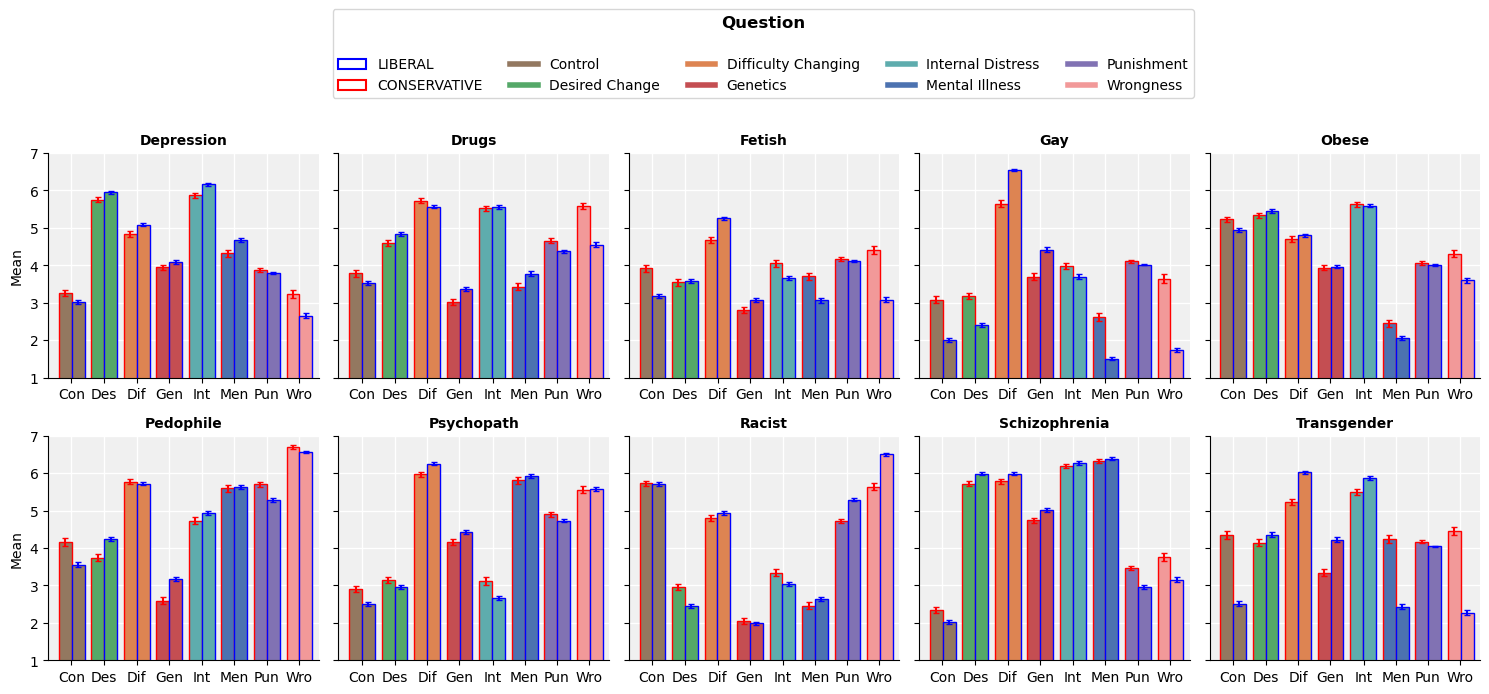

In [11]:
def custom_barplot(x, y, hue, data, width, palette, stde_col, **kwargs):
    x_categories = data[x].unique()
    hue_categories = data[hue].unique()
    
    for i, x_val in enumerate(x_categories):
        x_data = data[data[x] == x_val]
        for j, hue_val in enumerate(hue_categories):
            hue_data = x_data[x_data[hue] == hue_val]
            position = i - width / 2 + j * width / len(hue_categories)
            mean = hue_data[y].mean()
            stde_val = hue_data[stde_col].values[0] if not hue_data.empty else 0
            
            kwargs_no_color = {k: v for k, v in kwargs.items() if k != "color"}
            edge_color = "blue" if "Liberal" in hue_val else "red"
            plt.bar(position,
                    mean,
                    width=width / len(hue_categories),
                    color=palette[hue_val],
                    edgecolor=edge_color,
                    linewidth=1,
                    **kwargs_no_color)

            # add error bars
            plt.errorbar(position, mean, yerr=stde_val, fmt='none', ecolor=edge_color, capsize=2, elinewidth=1.5)
    
    abbreviations = [q[:3] for q in x_categories] # set x-tick labels to abbreviations of each question
    
    tick_positions = [-14.1, -9.3, -4.55, 0.15, 5, 9.7, 14.4, 19.1]
    plt.xticks(tick_positions, abbreviations, ha="center")

g = sns.FacetGrid(data=MI_idx, col="Condition", col_wrap=5, sharex=False, sharey=True, height=3, aspect=1)
g.map_dataframe(custom_barplot, x="Question", y="Mean", hue="hue", width=30, palette=flattened_palette, stde_col="Stde")

# AESTHETICS

g.set(xlim=(-17.5, 22)) # set x-axis limits for each facet
g.set(ylim=(1, 7)) # set y-axis limits for each facet
g.set_xlabels('')  # remove x-axis label
g.set_titles(fontweight='bold', col_template="{col_name}") # title

for ax in g.axes.flat:
    ax.set_facecolor('#F0F0F0')  # set background color
    ax.yaxis.grid(True, linestyle='-', linewidth=1, alpha=1, color = 'white')  # faint horizontal gridlines
    ax.xaxis.grid(True, linestyle='-', linewidth=1, alpha=1, color = 'white')  # faint vertical gridlines
    ax.set_axisbelow(True)  # put gridlines below bar plots

unique_colors = list(set(flattened_palette.values())) # flattened_palette = dictionary mapping label names to colors

unique_colors = [(0.576, 0.47, 0.376, 1.0), # control / brown
                 (0.333, 0.659, 0.408, 1.0), # desired change / green
                 (0.867, 0.518, 0.322, 1.0), # difficulty changing / orange
                 (0.769, 0.306, 0.322, 1.0), # genes / red
                 (0.368, 0.676, 0.678, 1.0), # internal distress / teal
                 (0.298, 0.447, 0.69, 1.0), # mental illness / blue
                 (0.506, 0.447, 0.701, 1.0), # punishment / purple
                 (0.95, 0.6, 0.6, 1.0)] # wrongness / pink

custom_labels = ["Control",
                 "Desired Change",
                 "Difficulty Changing",
                 "Genetics",
                 "Internal Distress",
                 "Mental Illness",
                 "Punishment",  
                 "Wrongness"] 

outline_handles = [Rectangle((0, 0), 0.5, 0.25, facecolor='white', edgecolor='blue', lw=1.5, label='LIBERAL'),
                   Rectangle((0, 0), 0.5, 0.25, facecolor='white', edgecolor='red', lw=1.5, label='CONSERVATIVE')]

legend_elements = outline_handles + [Line2D([0], [0], 
                                    color=unique_colors[i], 
                                    lw=4, 
                                    label=custom_labels[i]) for i in range(len(unique_colors))]

spacer = Line2D([0], [0], color='none', lw=0, label='')
legend_elements.insert(0, spacer)
legend_elements.insert(3, spacer)
legend_elements.insert(6, spacer)
legend_elements.insert(9, spacer)
legend_elements.insert(12, spacer)

legend = plt.legend(handles=legend_elements, # add legend to facet grid
                    ncol=5, 
                    bbox_to_anchor=(-1.65, 2.7), 
                    loc='center', 
                    title='Question', 
                    title_fontsize=12)

legend.get_title().set_fontweight('bold')  # bold legend title

plt.show()

save_path = "/Users/merieldoyle/Desktop/descriptives_ideology.png"
g.savefig(save_path, dpi=300)